In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r'C:\Users\AVGorshkov\Downloads\HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [4]:
'''Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).'''

df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
column_names = df.columns.tolist()

for i in column_names:
    try:
        print("Среднее для ", i, df[i].mean())
        print("Медиана для ", i, df[i].median())
        print("Мода для ", i, df[i].mode()[0])
        print("MIN для ", i, df[i].min())
        print("MAX для ", i, df[i].max())
        print("Среднеквадратическое отклонение для ", i, df[i].std())
    except:
        pass
    

Среднее для  satisfaction_level 0.6128335222348156
Медиана для  satisfaction_level 0.64
Мода для  satisfaction_level 0.1
MIN для  satisfaction_level 0.09
MAX для  satisfaction_level 1.0
Среднеквадратическое отклонение для  satisfaction_level 0.2486306510611418
Среднее для  last_evaluation 0.7161017401160078
Медиана для  last_evaluation 0.72
Мода для  last_evaluation 0.55
MIN для  last_evaluation 0.36
MAX для  last_evaluation 1.0
Среднеквадратическое отклонение для  last_evaluation 0.17116911062327592
Среднее для  number_project 3.80305353690246
Медиана для  number_project 4.0
Мода для  number_project 4
MIN для  number_project 2
MAX для  number_project 7
Среднеквадратическое отклонение для  number_project 1.2325923553183857
Среднее для  average_montly_hours 201.0503366891126
Медиана для  average_montly_hours 200.0
Мода для  average_montly_hours 135
MIN для  average_montly_hours 96
MAX для  average_montly_hours 310
Среднеквадратическое отклонение для  average_montly_hours 49.943099371284

<Axes: >

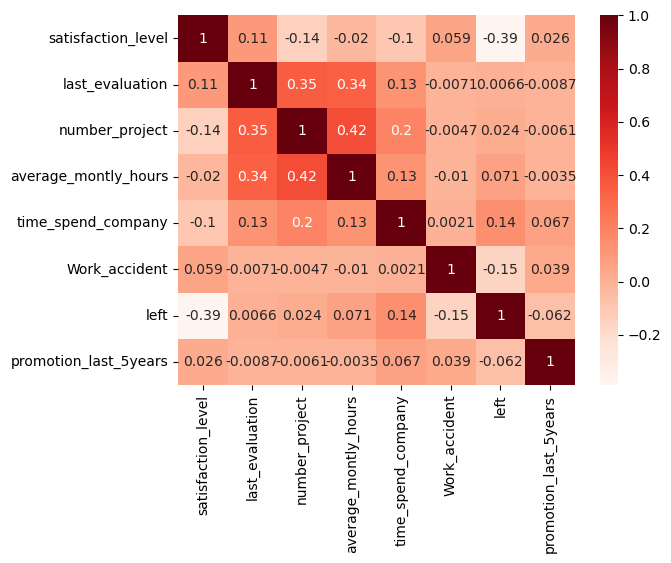

In [7]:
'''Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.'''

corr_matrix = df[["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company", "Work_accident", "left", "promotion_last_5years"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Reds')

In [8]:
corr_matrix

corrs = [(corr_matrix.iloc[row,col], df.columns[row], df.columns[col]) for row in range(1, 8) for col in range(row)]
max2 = sorted(corrs, key=lambda x: abs(x[0]), reverse=True)[:2]
min2 = sorted(corrs, key=lambda x: abs(x[0]), reverse=False)[:2]
print("две самые скоррелированные переменные:\n", max2, "\nдве наименее скоррелированные переменные:\n", min2 )

две самые скоррелированные переменные:
 [(0.41721063440177986, 'average_montly_hours', 'number_project'), (-0.3883749834241161, 'left', 'satisfaction_level')] 
две наименее скоррелированные переменные:
 [(0.0021204180967097077, 'Work_accident', 'time_spend_company'), (-0.0035444142929947717, 'promotion_last_5years', 'average_montly_hours')]


In [9]:
'''Рассчитайте сколько сотрудников работает в каждом
департаменте.'''

df["department"].value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

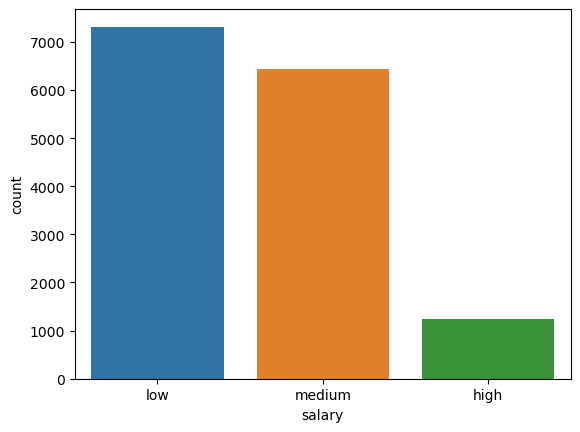

salary
high      1237
low       7316
medium    6446
Name: department, dtype: int64

In [10]:
'''Показать распределение сотрудников по зарплатам.'''

sns.countplot(data=df, x="salary")
plt.show()

df.groupby('salary').department.count()

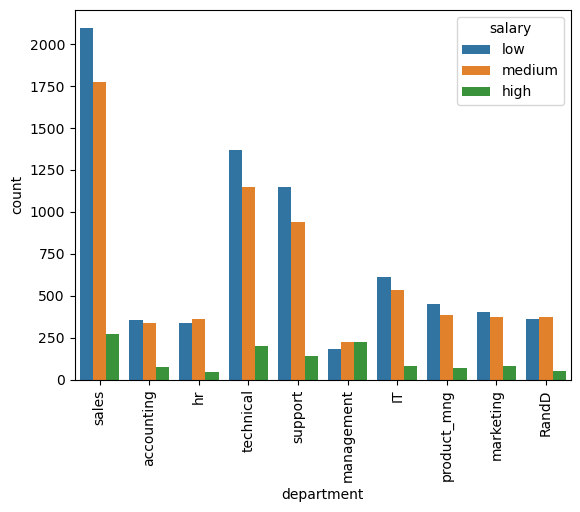

qty_people
department  salary            
IT          high            83
            low            609
            medium         535
RandD       high            51
            low            364
            medium         372
accounting  high            74
            low            358
            medium         335
hr          high            45
            low            335
            medium         359
management  high           225
            low            180
            medium         225
marketing   high            80
            low            402
            medium         376
product_mng high            68
            low            451
            medium         383
sales       high           269
            low           2099
            medium        1772
support     high           141
            low           1146
            medium         942
technical   high           201
            low           1372
            medium        1147

In [11]:
'''Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности'''

sns.countplot(data=df, x="department", hue= "salary")
plt.xticks(rotation=90)
plt.show()

df.groupby(['department', 'salary'])\
    .agg({'satisfaction_level': 'count'})\
    .rename(columns={"satisfaction_level": "qty_people"})

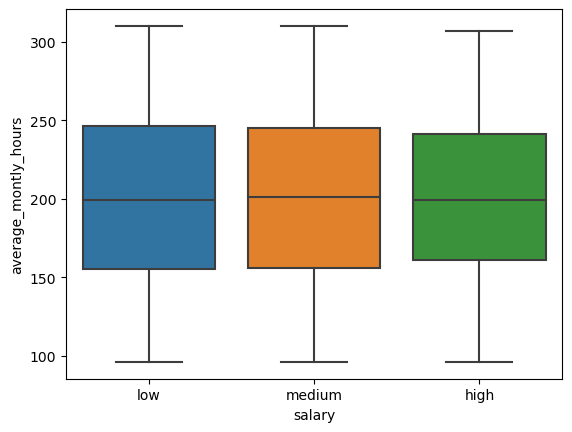

average_montly_hours         
                     median min  max
salary                              
high                  199.0  96  307
low                   199.0  96  310
medium                201.0  96  310

In [12]:
'''Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом'''

sns.boxplot(data = df, y= 'average_montly_hours', x = 'salary')
plt.show()
df.groupby('salary').agg({'average_montly_hours': ['median', 'min', 'max']}) 

In [13]:
'''Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов'''

#уволившиеся сотрудники
df_resigned = df[df['left'] == 1]
share_r = df_resigned['promotion_last_5years'].sum()/df_resigned['promotion_last_5years'].count()
mean_rsl = df_resigned['satisfaction_level'].mean()
mean_rnp = df_resigned['number_project'].mean()
print('Доля сотрудников с повышением за последние 5 лет:', f"{share_r:.2%}")
print('Средняя степень удовлетворенности: ', f"{mean_rsl:.2%}")
print('Среднее количество проектов: ', round(mean_rnp, 1))

Доля сотрудников с повышением за последние 5 лет: 0.53%
Средняя степень удовлетворенности:  44.01%
Среднее количество проектов:  3.9


In [14]:
#активные сотрудники
df_act = df[df['left'] != 1]
share = df_act['promotion_last_5years'].sum()/df_act['promotion_last_5years'].count()
mean = df_act['satisfaction_level'].mean()
mean_np = df_act['number_project'].mean()
print('Доля сотрудников с повышением за последние 5 лет:', f"{share:.2%}")
print('Средняя степень удовлетворенности: ', f"{mean:.2%}")
print('Среднее количество проектов: ', round(mean_np, 1))

Доля сотрудников с повышением за последние 5 лет: 2.63%
Средняя степень удовлетворенности:  66.68%
Среднее количество проектов:  3.8


In [15]:
'''Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки'''


X= df[['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']]


In [16]:
y= df['left']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit_transform(X_train,y_train)

array([[ 0.98202329],
       [-0.04273998],
       [ 0.20028435],
       ...,
       [-0.35234133],
       [-0.06964356],
       [-0.71128471]])

              precision    recall  f1-score   support

        Stay       0.79      0.91      0.85      2853
       Leave       0.47      0.25      0.32       897

    accuracy                           0.75      3750
   macro avg       0.63      0.58      0.59      3750
weighted avg       0.72      0.75      0.72      3750



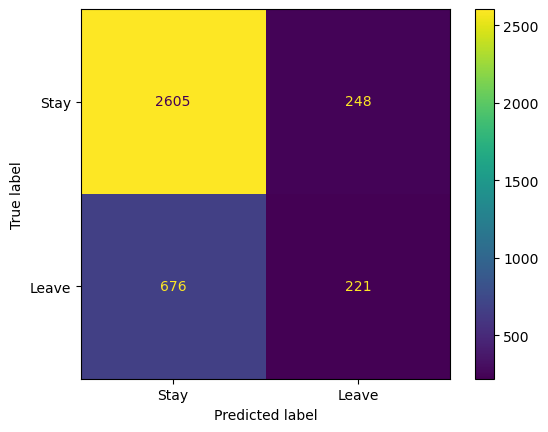

In [19]:
y_pred= lda.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, 
                                y_pred=y_pred, 
                                target_names=["Stay", "Leave"]))

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                      display_labels=["Stay", "Leave"])